# Подготовительные моменты

Подключение необходимых библиотек.

In [1]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import WordPunctTokenizer
from pymorphy3 import MorphAnalyzer
from wordcloud import WordCloud

nltk.download("stopwords")
nltk.download("wordnet")
sns.set_theme()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sosno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sosno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Чтение текста книги из файла и сохранение в строковую переменную.

In [2]:
file_name = "the_mysterious_island.txt"
with open(file_name, encoding="utf-8") as file_in:
    text = file_in.read()
print(text[:300])

Жюль Верн

Таинственный остров



ЧАСТЬ ПЕРВАЯ

КРУШЕНИЕ В ВОЗДУХЕ



ГЛАВА ПЕРВАЯ


Ураган 1865 года. — Возгласы над морской пучиной. — Воздушный шар, унесённый бурей. — Разорванная оболочка. — Кругом только море. — Пять путников. — Что произошло в гондоле. — Земля на горизонте. — Развязка драмы.




# Токенизация

Приведение текста к нижнему регистру и замена всех букв «ё» на «е». Затем разделение текста на токены с помощью `WordPunctTokenizer` библиотеки `nltk`, который выделяет слова и пунктуацию в отдельные токены. Сохранение только тех токенов, которые целиком состоят из букв, т. е. являются словами.

In [ ]:
tokenizer = WordPunctTokenizer()
tokens = tokenizer.tokenize(text.replace("ё", "е").lower())
words_0 = [word for word in tokens if word.isalpha()]
words_0[:30]

['жюль',
 'верн',
 'таинственный',
 'остров',
 'часть',
 'первая',
 'крушение',
 'в',
 'воздухе',
 'глава',
 'первая',
 'ураган',
 'года',
 'возгласы',
 'над',
 'морской',
 'пучиной',
 'воздушный',
 'шар',
 'унесенный',
 'бурей',
 'разорванная',
 'оболочка',
 'кругом',
 'только',
 'море',
 'пять',
 'путников',
 'что',
 'произошло']

Подсчёт частоты появления каждого слова в тексте. Создание таблицы на основе полученных данных и визуализация в виде линейной диаграммы.

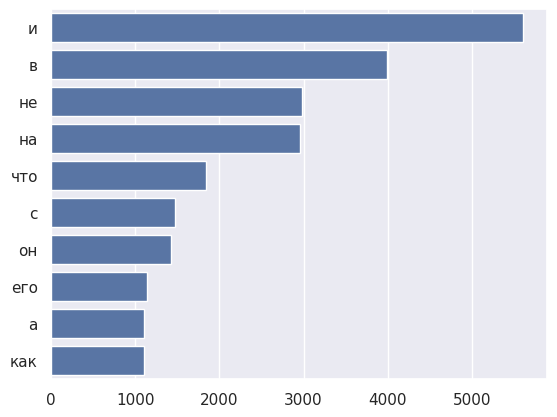

In [ ]:
word_counts_0 = Counter(words_0)
word_frequencies_0 = pd.DataFrame({
    "word": word_counts_0.keys(),
    "frequency": word_counts_0.values()
})
word_frequencies_0.sort_values("frequency", ascending=False, inplace=True)
sns.barplot(
    x="frequency", y="word", data=word_frequencies_0.head(10)
).set(xlabel="", ylabel="");

Генерация изображения облака слов из только что посчитанных частот.

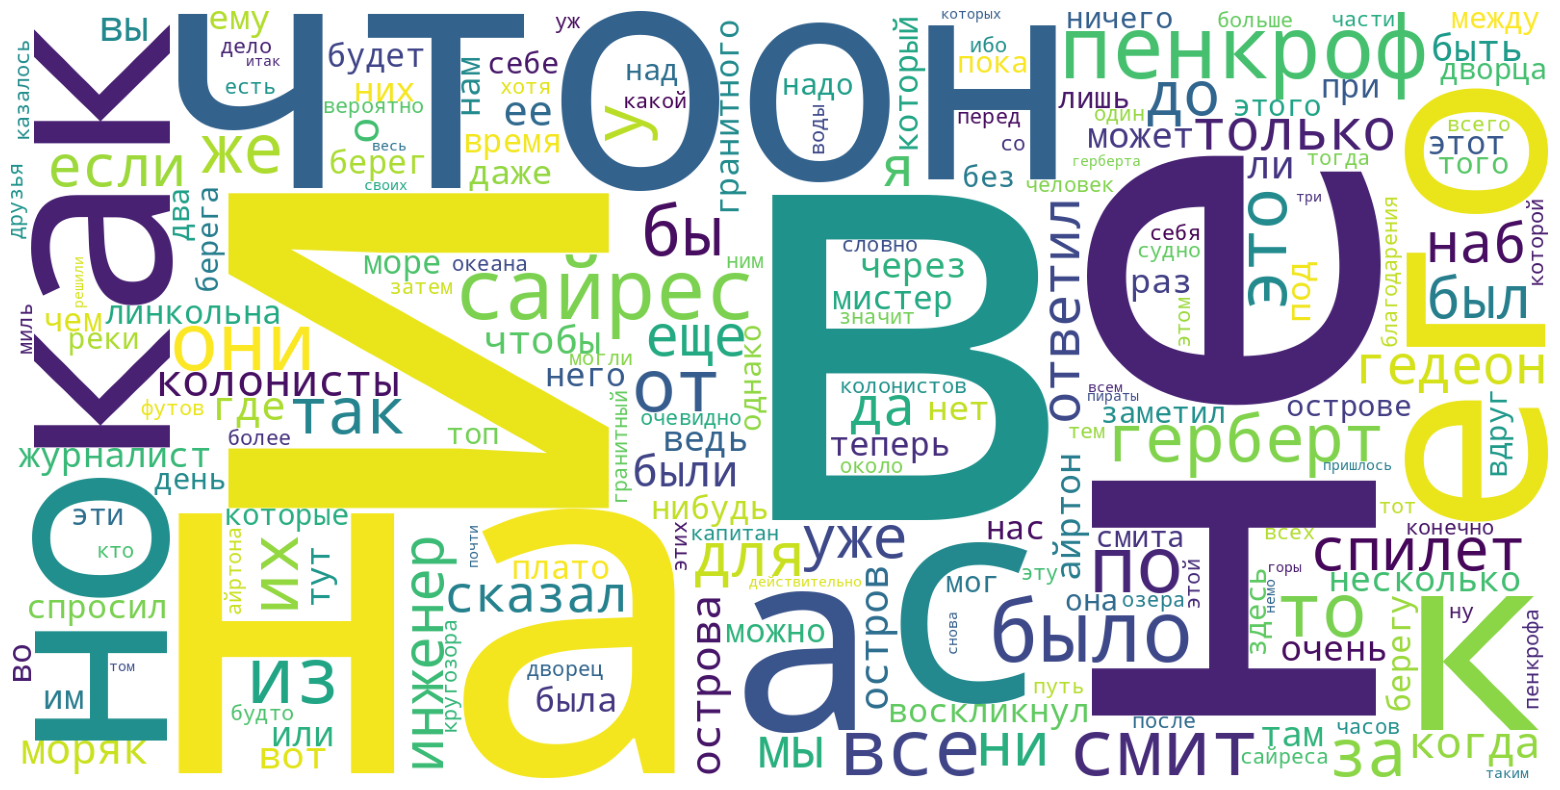

In [ ]:
cloud_0 = WordCloud(
    width=1600, height=800, random_state=0, background_color="white", collocations=False
).generate_from_frequencies(word_counts_0)
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.imshow(cloud_0);

Видно, что наиболее частыми словами являются союзы, предлоги, местоимения и т. п. Избавимся от подобных слов, чтобы лучше видеть более значимые слова для анализа текста.

# Удаление стоп-слов

Фильтрация слов, которые содержатся в списке стоп-слов русского языка библиотеки `nltk`.

In [ ]:
stop_words = set(stopwords.words("russian"))
words_1 = [word for word in words_0 if word not in stop_words]
words_1[:30]

['жюль',
 'верн',
 'таинственный',
 'остров',
 'часть',
 'первая',
 'крушение',
 'воздухе',
 'глава',
 'первая',
 'ураган',
 'года',
 'возгласы',
 'морской',
 'пучиной',
 'воздушный',
 'шар',
 'унесенный',
 'бурей',
 'разорванная',
 'оболочка',
 'кругом',
 'море',
 'пять',
 'путников',
 'произошло',
 'гондоле',
 'земля',
 'горизонте',
 'развязка']

Подсчёт частоты появления каждого слова в тексте после удаления стоп-слов. Создание таблицы на основе полученных данных и визуализация в виде линейной диаграммы.

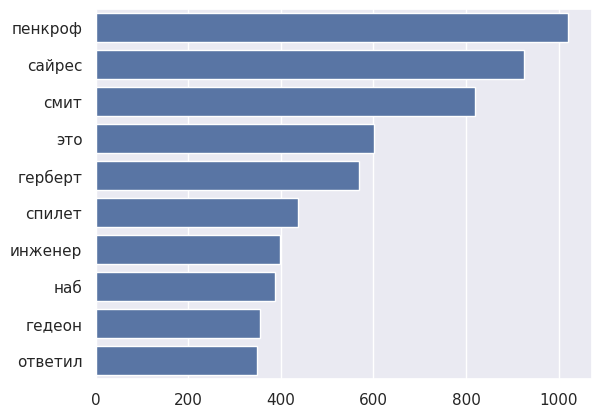

In [ ]:
word_counts_1 = Counter(words_1)
word_frequencies_1 = pd.DataFrame({
    "word": word_counts_1.keys(),
    "frequency": word_counts_1.values()
})
word_frequencies_1.sort_values("frequency", ascending=False, inplace=True)
sns.barplot(
    x="frequency", y="word", data=word_frequencies_1.head(10)
).set(xlabel="", ylabel="");

Генерация изображения облака слов из только что посчитанных частот.

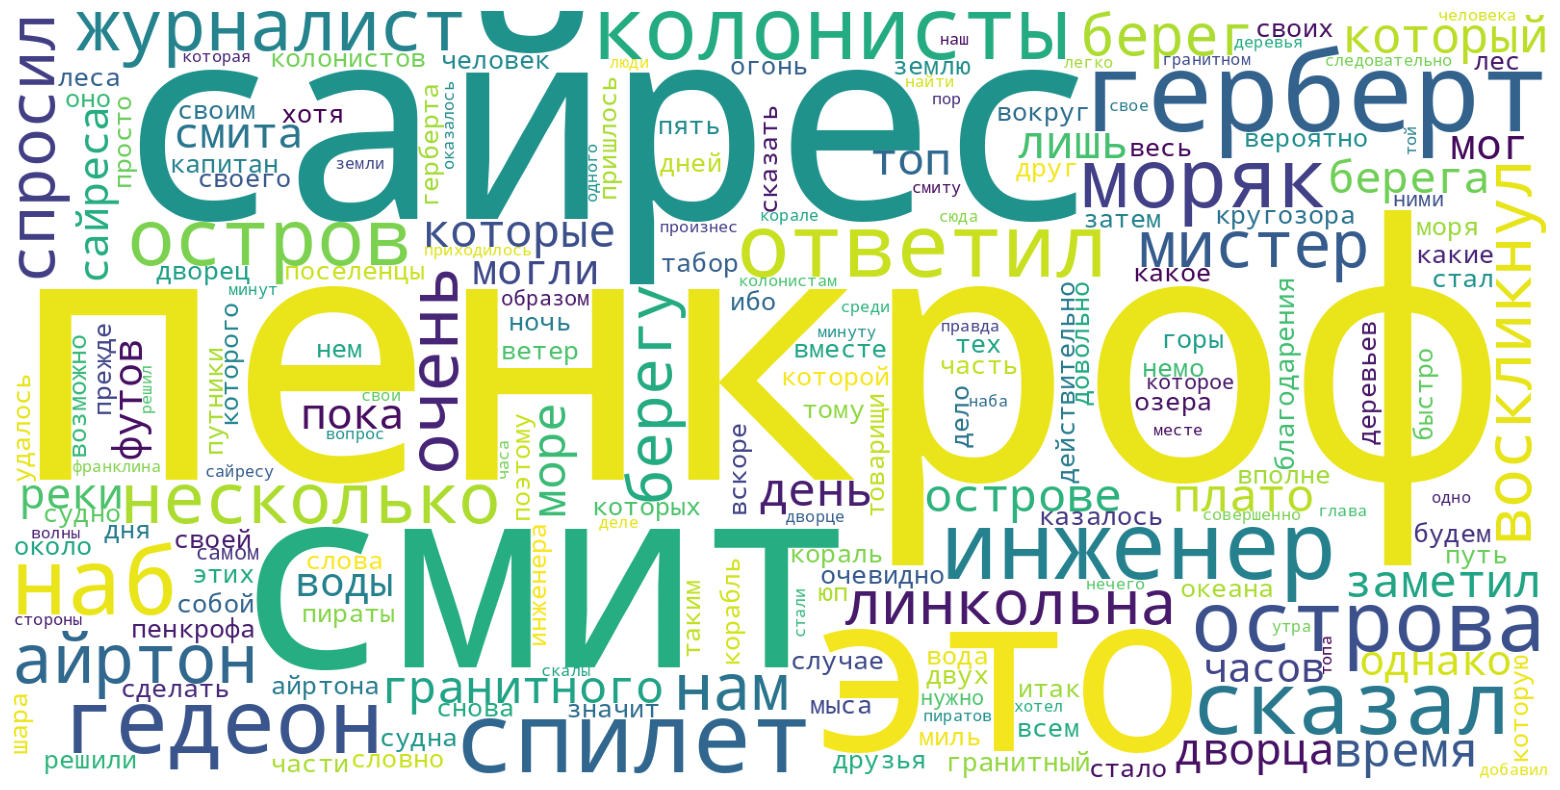

In [ ]:
cloud_1 = WordCloud(
    width=1600, height=800, random_state=0, background_color="white", collocations=False
).generate_from_frequencies(word_counts_1)
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.imshow(cloud_1);

После удаления стоп-слов самыми частыми словами стали имена главных героев и их профессии. Далее идут прочие слова, описывающие действия и события. Но эти слова могут несколько раз повторяться в разных формах, что не несёт в себе большого смысла, поэтому требуется привести их к одной форме. Для этого можно использовать стемминг или лемматизацию.

# Стемминг

Выделение основ слов с помощью `SnowballStemmer` библиотеки `nltk` и сохранение нового списка токенов.

In [ ]:
stemmer = SnowballStemmer("russian")
words_2 = [stemmer.stem(word) for word in words_1]
words_2[:30]

['жюл',
 'верн',
 'таинствен',
 'остр',
 'част',
 'перв',
 'крушен',
 'воздух',
 'глав',
 'перв',
 'урага',
 'год',
 'возглас',
 'морск',
 'пучин',
 'воздушн',
 'шар',
 'унесен',
 'бур',
 'разорва',
 'оболочк',
 'круг',
 'мор',
 'пят',
 'путник',
 'произошл',
 'гондол',
 'земл',
 'горизонт',
 'развязк']

Подсчёт частоты появления каждого слова в тексте после применения стемминга. Создание таблицы на основе полученных данных и визуализация в виде линейной диаграммы.

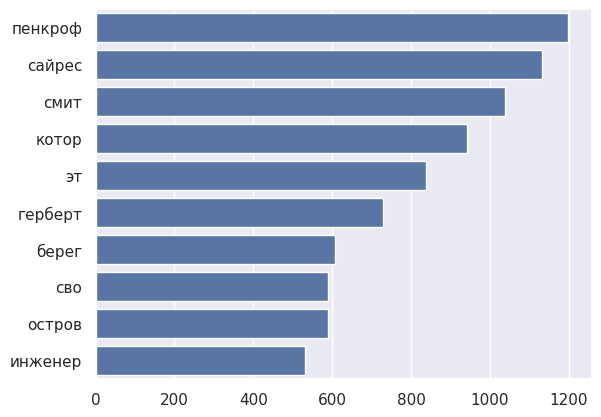

In [ ]:
word_counts_2 = Counter(words_2)
word_frequencies_2 = pd.DataFrame({
    "word": word_counts_2.keys(),
    "frequency": word_counts_2.values()
})
word_frequencies_2.sort_values("frequency", ascending=False, inplace=True)
sns.barplot(
    x="frequency", y="word", data=word_frequencies_2.head(10)
).set(xlabel="", ylabel="");

Генерация изображения облака слов из только что посчитанных частот.

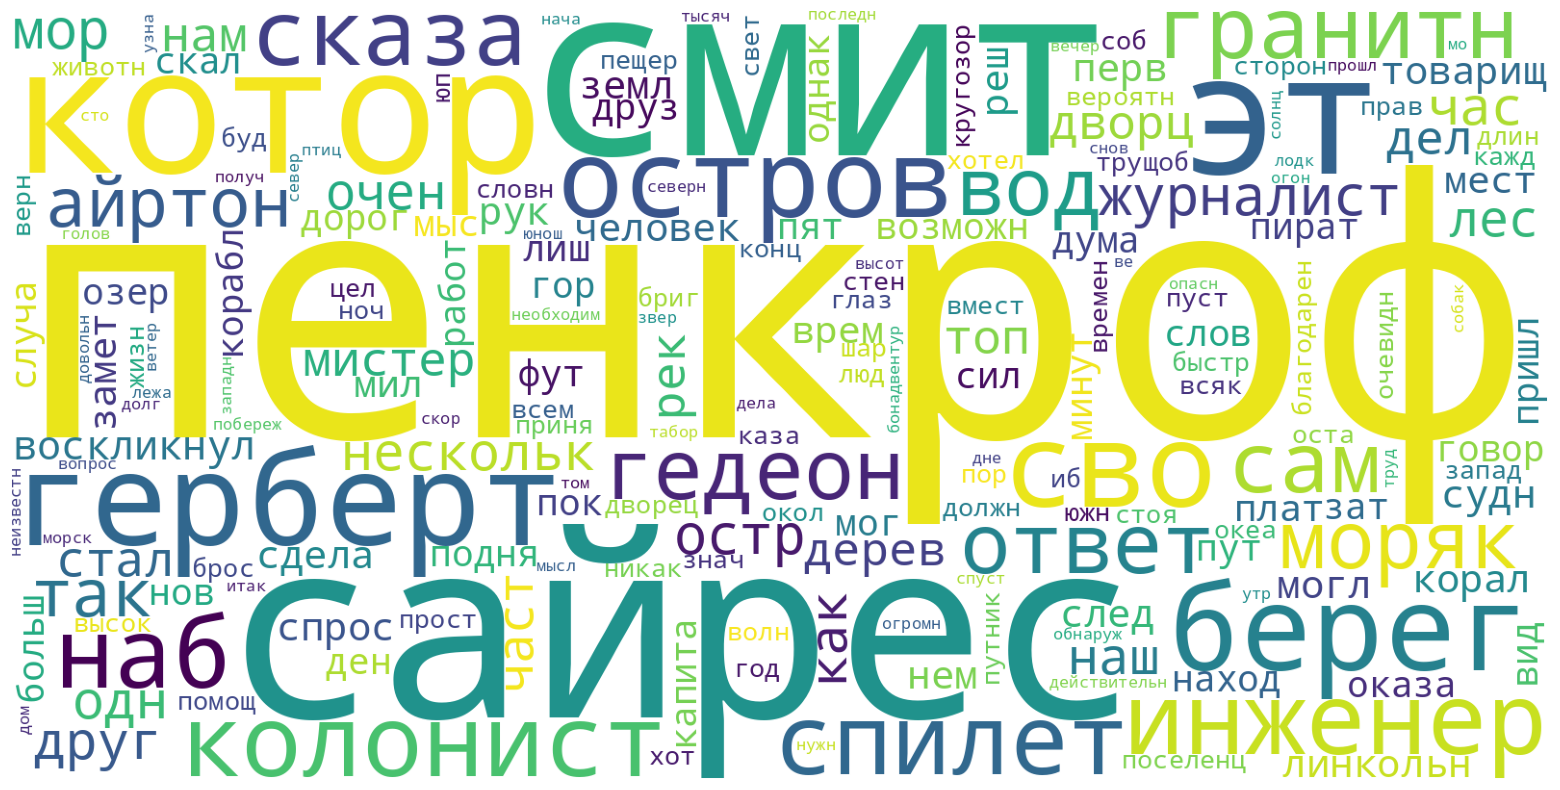

In [ ]:
cloud_2 = WordCloud(
    width=1600, height=800, random_state=0, background_color="white", collocations=False
).generate_from_frequencies(word_counts_2)
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.imshow(cloud_2);

После применения стемминга уникальных слов стало значительно больше. Но некоторые почти полностью потеряли смысл, например «подня», «зат», «мил» и т. д. Попробуем лемматизацию и сравним результаты.

# Лемматизация

Приведение слов к нормальной форме с помощью `MorphAnalyzer` библиотеки `pymorphy3` и сохранение нового списка токенов.

In [ ]:
morph = MorphAnalyzer()
words_3 = [morph.normal_forms(word)[0] for word in words_1]
words_3[:30]

['жюля',
 'верна',
 'таинственный',
 'остров',
 'часть',
 'первый',
 'крушение',
 'воздух',
 'глава',
 'первый',
 'ураган',
 'год',
 'возглас',
 'морской',
 'пучина',
 'воздушный',
 'шар',
 'унести',
 'буря',
 'разорвать',
 'оболочка',
 'кругом',
 'море',
 'пять',
 'путник',
 'произойти',
 'гондола',
 'земля',
 'горизонт',
 'развязка']

Подсчёт частоты появления каждого слова в тексте после применения лемматизации. Создание таблицы на основе полученных данных и визуализация в виде линейной диаграммы.

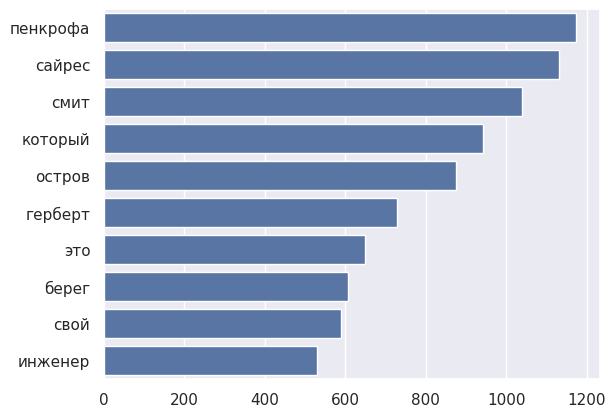

In [ ]:
word_counts_3 = Counter(words_3)
word_frequencies_3 = pd.DataFrame({
    "word": word_counts_3.keys(),
    "frequency": word_counts_3.values()
})
word_frequencies_3.sort_values("frequency", ascending=False, inplace=True)
sns.barplot(
    x="frequency", y="word", data=word_frequencies_3.head(10)
).set(xlabel="", ylabel="");

Генерация изображения облака слов из только что посчитанных частот.

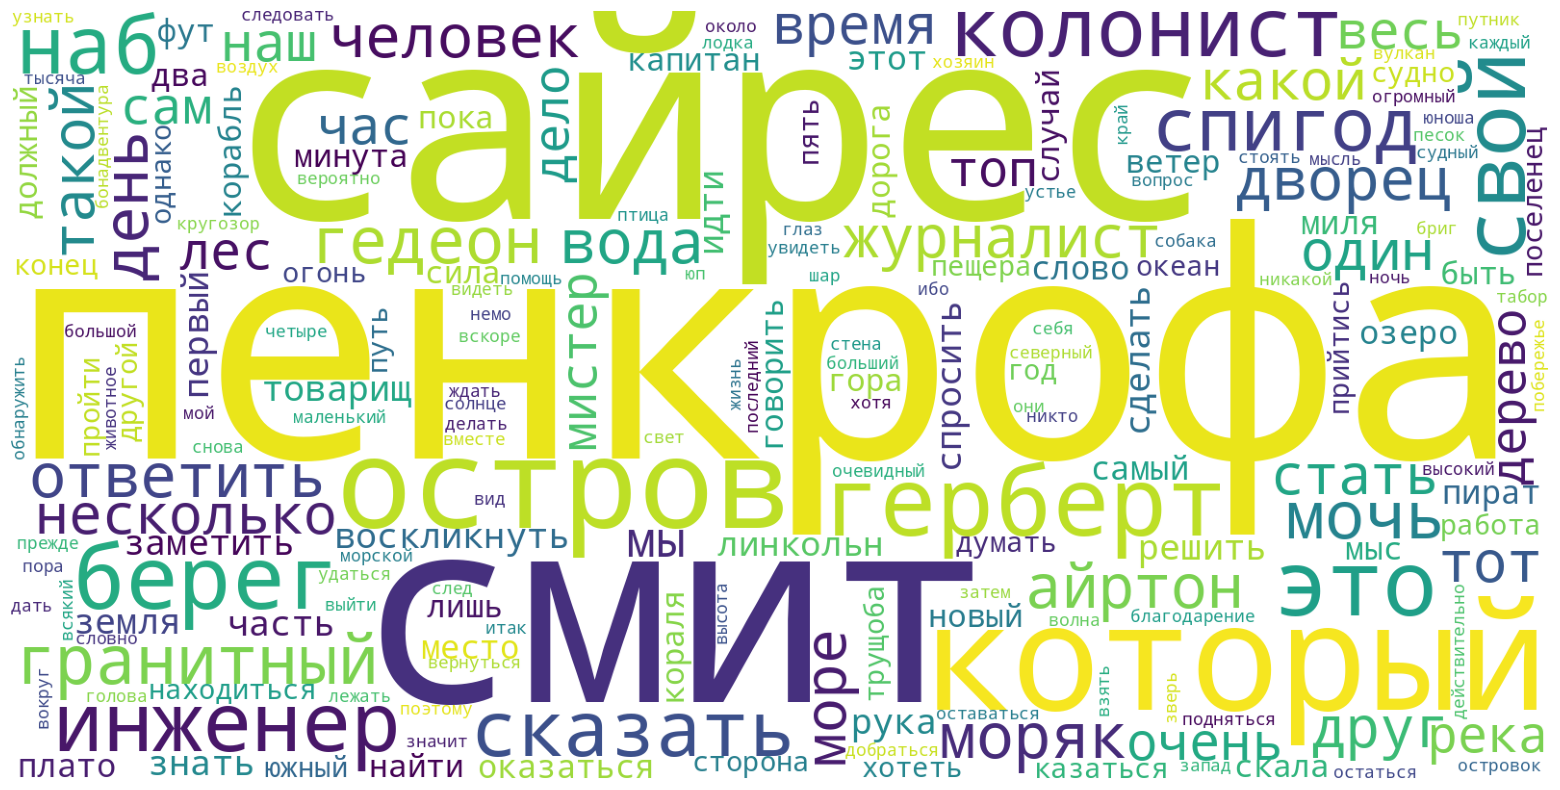

In [ ]:
cloud_3 = WordCloud(
    width=1600, height=800, random_state=0, background_color="white", collocations=False
).generate_from_frequencies(word_counts_3)
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.imshow(cloud_3);

После применения лемматизации уникальных слов также стало больше, при этом они остались осмысленными. В этом плане лемматизация эффективнее и удобнее стемминга. Но возникли некоторые проблемы с именами собственными, например, «Жюль» — «Жюля», «Верн» — «Верна», «Пенкроф» — «Пенкрофа».